# Desafio da Envoltória Convexa em Python

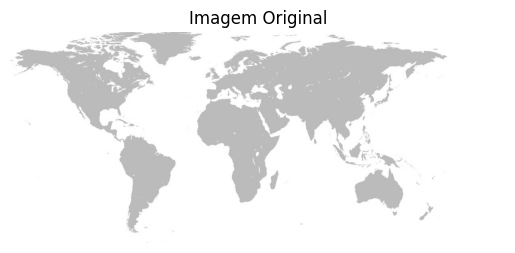

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# from google.colab import files

# Para abrir uma imagem do seu computador no Google Colab, você pode usar a biblioteca files que o Google Colab fornece
# uploaded = files.upload()

# Depois de fazer o upload da imagem, você pode usar o nome do arquivo para acessá-la
# Leitura da imagem de entrada
src = cv2.imread("sample.jpg", 1)

# Exiba a imagem original
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('Imagem Original')
plt.axis('off')
plt.show()

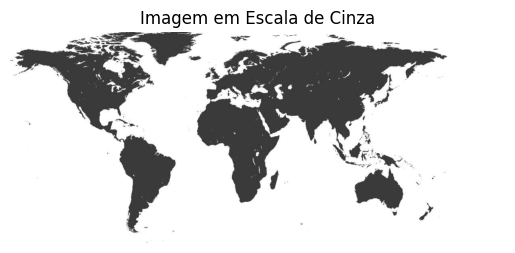

In [3]:
# Conversão da imagem para escala de cinza
# [INSIRA O SEU BLOCO DE CÓDIGO AQUI]
# Conversão da imagem para escala de cinza
gray_img = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# Exiba a imagem em escala de cinza
# [INSIRA O SEU BLOCO DE CÓDIGO AQUI]
# Exiba a imagem em escala de cinza
plt.imshow(gray_img, cmap='gray')
plt.title('Imagem em Escala de Cinza')
plt.axis('off')
plt.show()

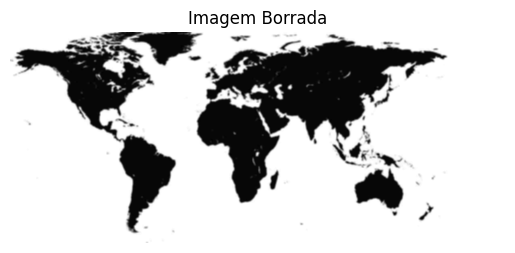

In [4]:
# Aplicação de um desfoque (blur) na imagem para remover ruído
blurred_img = cv2.blur(gray_img, (5, 5))

# Exiba a imagem após a aplicação do desfoque
plt.imshow(blurred_img, cmap='gray')
plt.title('Imagem Borrada')
plt.axis('off')
plt.show()

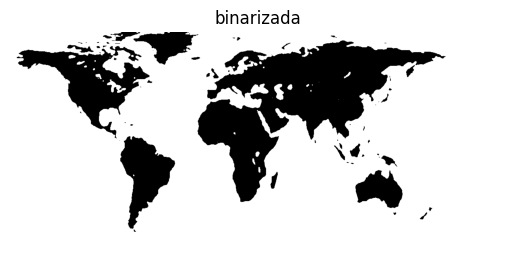

In [5]:
# Binarize the image
threshold_value = 200
binary_img = blurred_img.copy()
binary_img[binary_img <= threshold_value] = 0
binary_img[binary_img > threshold_value] = 255

# Display the binarized image
plt.imshow(binary_img, cmap='gray')
plt.title('binarizada')
plt.axis('off')
plt.show()

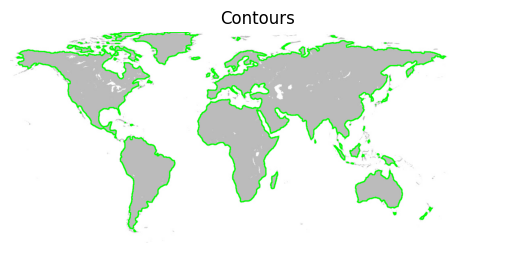

In [6]:
# Invert the bits of the binary image
inverted_img = cv2.bitwise_not(binary_img)

# Find contours in the inverted image
contours, _ = cv2.findContours(inverted_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the blank image
contour_img = src.copy()
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)

# Display the result
plt.imshow(contour_img)
plt.title('Contours')
plt.axis('off')
plt.show()

In [7]:

# Encontre a Envoltória Convexa para cada contorno
convex_hulls = [cv2.convexHull(cnt) for cnt in contours]

# Crie uma imagem em branco
blank_img = cv2.bitwise_not(np.zeros_like(src))

# Desenhe os contornos em verde
cv2.drawContours(blank_img, contours, -1, (0, 255, 0), 2)

# Desenhe a Envoltória Convexa em azul
cv2.drawContours(blank_img, convex_hulls, -1, (0, 0, 255), 2)
print()

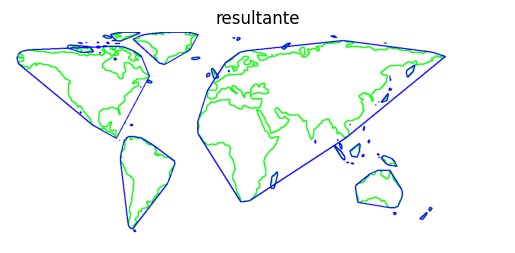

In [8]:
# Exiba a imagem resultante com os contornos e a Envoltória Convexa
plt.imshow(blank_img)
plt.title('resultante')
plt.axis('off')
plt.show()